<a href="https://colab.research.google.com/github/DataTak/walmart-sales_analysis/blob/main/%08notebooks/walmart_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 케글 폴더 생성 및 파일이동
- json 파일 사전에 올려두기

In [4]:
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 68 Sep 26 10:10 kaggle.json
/content


### 권한설정

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

### 데이터셋 다운로드

In [7]:
# !kaggle datasets download -d 데이터소유자/데이터셋이름
!kaggle datasets download -d devarajv88/walmart-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset
License(s): other
walmart-sales-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


### 데이터압축해제

In [8]:
import zipfile
with zipfile.ZipFile('walmart-sales-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

### 데이터 불러오기

In [9]:
import pandas as pd

In [14]:
df = pd.read_csv('/content/data/walmart.csv')

In [15]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370


In [16]:
#직업과 구매금액과의 관계 / 결혼여부와 구매금액과의 관계 / ..
# 30대 여성에게 어떤 쿠폰을 보내는 것이 좋을까?  .. 특정 제품 카테고리에 어떤것을 구매했는가?
# 지역에 따라 구매하는 제품이 달라지지 않을까?
# 직업에 따라서 구매하는 제품이 다를까? 구매금액이 다를까?

### 탐색적 데이터 분석(EDA)


In [25]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [53]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [52]:
# 전체 데이터 수
df.shape

(550068, 10)

- 전체 550,068건의 인스턴스가 있는 데이터입니다.

In [60]:
# 사용자 수
df.User_ID.nunique()

5891

- 해당 데이터에 포함되어있는 고유한 소비자는 5,891명 입니다.

In [62]:
# 각 컬럼별 유일값
for col in df.columns:
    print(col, df[col].unique(), "/ 개수: ", len(df[col].unique()))

User_ID [1000001 1000002 1000003 ... 1004113 1005391 1001529] / 개수:  5891
Product_ID ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853'] / 개수:  3631
Gender ['F' 'M'] / 개수:  2
Age ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] / 개수:  7
Occupation [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6] / 개수:  21
City_Category ['A' 'C' 'B'] / 개수:  3
Stay_In_Current_City_Years ['2' '4+' '3' '1' '0'] / 개수:  5
Marital_Status [0 1] / 개수:  2
Product_Category [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19] / 개수:  20
Purchase [ 8370 15200  1422 ...   135   123   613] / 개수:  18105


- 각 컬럼별 고유값 및 해당 고유값의 개수는 다음과 같습니다.
    - User_ID [1000001 1000002 1000003 ... 1004113 1005391 1001529] 5891
    - Product_ID ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644' 'P00370853'] 3631
    - Gender ['F' 'M'] 2
    - Age ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] 7
    - Occupation [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6] 21
    - City_Category ['A' 'C' 'B'] 3
    - Stay_In_Current_City_Years ['2' '4+' '3' '1' '0'] 5
    - Marital_Status [0 1] 2
    - Product_Category [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19] 20
    - Purchase [ 8370 15200  1422 ...   135   123   613] 18105

<Axes: xlabel='count', ylabel='Age'>

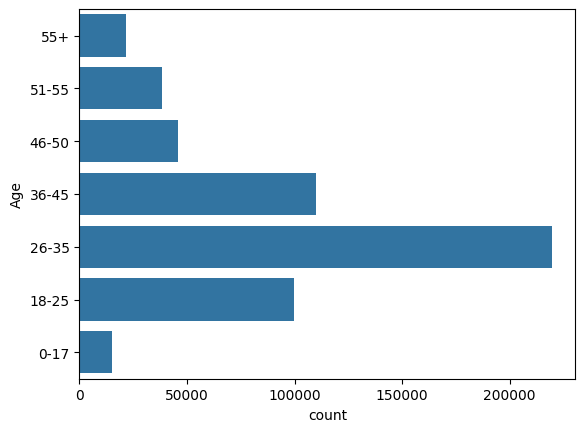

In [82]:
sns.countplot(df['Age'].sort_values(ascending=False))

- 연령대별 인원수 현황은 위 그래프와 같습니다.
- 26~35살의 나이 그룹이 가장 많은 물건을 구입하였습니다.

<Axes: ylabel='Age'>

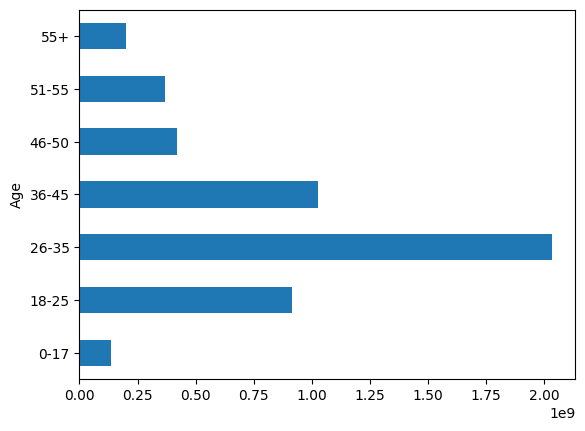

In [84]:
df.groupby('Age')['Purchase'].sum().plot(kind='barh')

- 연령대별 구매금액 합계는 위 그래프와 같습니다.
- 26~35살의 그룹의 구매 금액 합계 또한 가장 큽니다.

<Axes: ylabel='Age'>

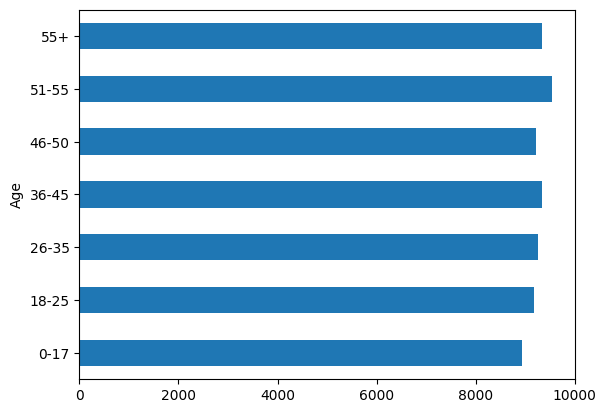

In [85]:
df.groupby('Age')['Purchase'].mean().plot(kind='barh')

- 연령대별 구매금액 평균은 위 그래프와 같습니다.
- 51-55살의 그룹의 구매 금액 평균이 가장 큽니다.

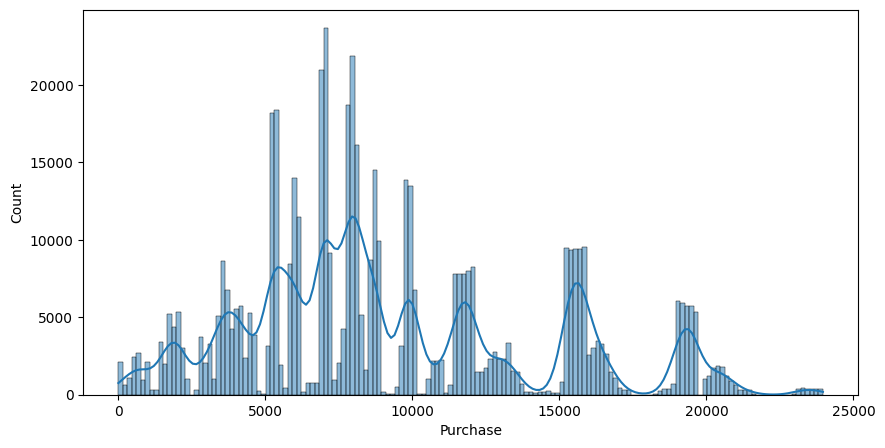

In [87]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Purchase'], kde=True)
plt.show()

In [41]:
# 어떤 제품이 가장 비싸지?
df.sort_values(by='Purchase', ascending=False).head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
370891,1003160,P00052842,M,26-35,17,C,3,0,10,23961
93016,1002272,P00052842,M,26-35,0,C,1,0,10,23961
87440,1001474,P00052842,M,26-35,4,A,2,1,10,23961
503697,1005596,P00117642,M,36-45,12,B,1,0,10,23960
321782,1001577,P00052842,M,55+,0,C,1,1,10,23960
349658,1005848,P00119342,M,51-55,20,A,0,1,10,23960
292083,1003045,P00052842,M,46-50,1,B,2,1,10,23960
298378,1003947,P00116142,M,26-35,0,C,3,0,10,23959
437804,1001387,P00086242,F,51-55,13,B,1,1,10,23959
229329,1005367,P00085342,M,18-25,4,A,1,0,10,23958


In [33]:
# 어떤 카테고리의 물건들 평균가격이 가장 비싸지?
df.groupby('Product_Category')['Purchase'].mean().sort_values(ascending=False)

,Purchase
Product_Category,
10,19675.570927
7,16365.689600
6,15838.478550
9,15537.375610
15,14780.451828
16,14766.037037
1,13606.218596
14,13141.625739
2,11251.935384


In [43]:
# 가장 많이 팔린 제품은 무엇일까?
df.groupby('Product_ID').size().sort_values(ascending=False)

,0
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
...,...
P00068742,1
P00012342,1
P00162742,1


In [44]:
# 월마트를 자주 찾는 사용자의 연령대
df.groupby('Age').size().sort_values(ascending=False)


,0
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [45]:
# 월마트를 자주 찾는 사용자의 직업군
df.groupby('Occupation').size().sort_values(ascending=False)

,0
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043
20,33562
12,31179
14,27309
2,26588


In [47]:
# 구매 금액이 가장 큰 사람(개인별로 구매금액 합계)
df.groupby('User_ID')['Purchase'].sum().sort_values(ascending=False)

,Purchase
User_ID,
1004277,10536909
1001680,8699596
1002909,7577756
1001941,6817493
1000424,6573609
...,...
1004991,52371
1005117,49668
1003883,49349
